In [1]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 150
import ot
import pickle

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:
with open(r"vae_mnist_v3_barycenter_extreme.pickle", "rb") as input_file:
    barycenter = pickle.load(input_file)

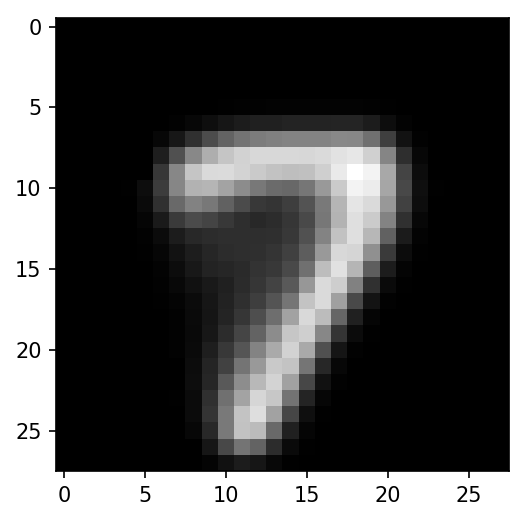

In [19]:
plt.imshow(barycenter,cmap='gray')

In [20]:
barycenter = barycenter.astype(np.float64)

In [21]:
barycenter /= barycenter.sum()

In [22]:
barycenter.sum()

1.0

In [8]:
x,y = np.indices((28,28))

In [9]:
x.reshape(-1).shape

(784,)

In [10]:
y.shape

(28, 28)

In [11]:
xs = np.zeros((28*28, 2))
xt = np.zeros((28*28, 2))

In [12]:
xs[:,0] = x.reshape(-1)
xs[:,1] = y.reshape(-1)

In [13]:
xt[:,0] = x.reshape(-1)
xt[:,1] = y.reshape(-1)

In [14]:
M = ot.dist(xs, xt, metric='euclidean')
M /= M.max()

In [15]:
barycenter.shape

(28, 28)

In [26]:
testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                   transform=torchvision.transforms.ToTensor(),
                   train=False,
                   download=False)

In [27]:
indices = testdataset.targets == 7

testdataset.data, testdataset.targets = testdataset.data[indices], testdataset.targets[indices]

In [28]:
randomseven = testdataset.data[1]

In [29]:
randomseven = randomseven.numpy().astype(np.float64)

In [30]:
randomseven /= randomseven.sum()

In [31]:
randomseven.sum()

1.0

In [18]:
testdataset = testdataset.data

In [19]:
#testdataset = (testdataset/testdataset.view(-1,28*28).sum(dim=1).view(-1,1,1))

In [20]:
testdata_arr = testdataset.numpy().astype(np.float64)

In [21]:
testdata_arr = np.divide(testdata_arr,np.sum(testdata_arr.reshape(-1,28*28),axis=1).reshape(-1,1,1))

In [22]:
testdata_arr.shape

(892, 28, 28)

In [23]:
testdata_arr[0].sum()

1.0

In [23]:
def get_wasserstein(digit):
    print("begin")
    testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                   transform=torchvision.transforms.ToTensor(),
                   train=False,
                   download=False)

    indices = testdataset.targets == digit

    testdataset.data, testdataset.targets = testdataset.data[indices], testdataset.targets[indices]
    testdataset = testdataset.data
    testdata_arr = testdataset.numpy().astype(np.float64)
    testdata_arr = np.divide(testdata_arr,np.sum(testdata_arr.reshape(-1,28*28),axis=1).reshape(-1,1,1))



    #wasserstein_list = np.array([])
    #wasserstein_scipy_list = np.array([])
    wasserstein_ot_list = np.array([])
    for image in testdata_arr:
        print(image.shape)
        
        #M = ot.dist(norm_image.view(28,28), mean_norm_image, metric='euclidean')
        wasserstein_ot_list = np.append(wasserstein_ot_list, ot.emd2(barycenter.reshape(-1), image.reshape(-1), M) )
        #wasserstein_list = np.append(wasserstein_list,loss(norm_image.view(28,28).to(device),mean_norm_image.to(device)).data.cpu().numpy())
        #wasserstein_scipy_list = np.append(wasserstein_scipy_list,wasserstein_distance(x.view(784).data.cpu().numpy(),mean_image.view(784).data.cpu().numpy()))
        
    #return loss_list, wasserstein_list, wasserstein_scipy_list
    return wasserstein_ot_list

In [32]:
def get_wasserstein_fromrandom(digit):
    print("begin")
    testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                   transform=torchvision.transforms.ToTensor(),
                   train=False,
                   download=False)

    indices = testdataset.targets == digit

    testdataset.data, testdataset.targets = testdataset.data[indices], testdataset.targets[indices]
    testdataset = testdataset.data
    testdata_arr = testdataset.numpy().astype(np.float64)
    testdata_arr = np.divide(testdata_arr,np.sum(testdata_arr.reshape(-1,28*28),axis=1).reshape(-1,1,1))



    #wasserstein_list = np.array([])
    #wasserstein_scipy_list = np.array([])
    wasserstein_ot_list = np.array([])
    for image in testdata_arr:
        print(image.shape)
        
        #M = ot.dist(norm_image.view(28,28), mean_norm_image, metric='euclidean')
        wasserstein_ot_list = np.append(wasserstein_ot_list, ot.emd2(randomseven.reshape(-1), image.reshape(-1), M) )
        #wasserstein_list = np.append(wasserstein_list,loss(norm_image.view(28,28).to(device),mean_norm_image.to(device)).data.cpu().numpy())
        #wasserstein_scipy_list = np.append(wasserstein_scipy_list,wasserstein_distance(x.view(784).data.cpu().numpy(),mean_image.view(784).data.cpu().numpy()))
        
    #return loss_list, wasserstein_list, wasserstein_scipy_list
    return wasserstein_ot_list

In [24]:
wass_five = get_wasserstein(5)

wass_seven = get_wasserstein(7)

wass_nine = get_wasserstein(9)

begin
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28,

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
begin
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28,

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(

In [33]:
wass_five_prime = get_wasserstein_fromrandom(5)

wass_seven_prime = get_wasserstein_fromrandom(7)

wass_nine_prime = get_wasserstein_fromrandom(9)

begin
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28,

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
begin
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28,

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(

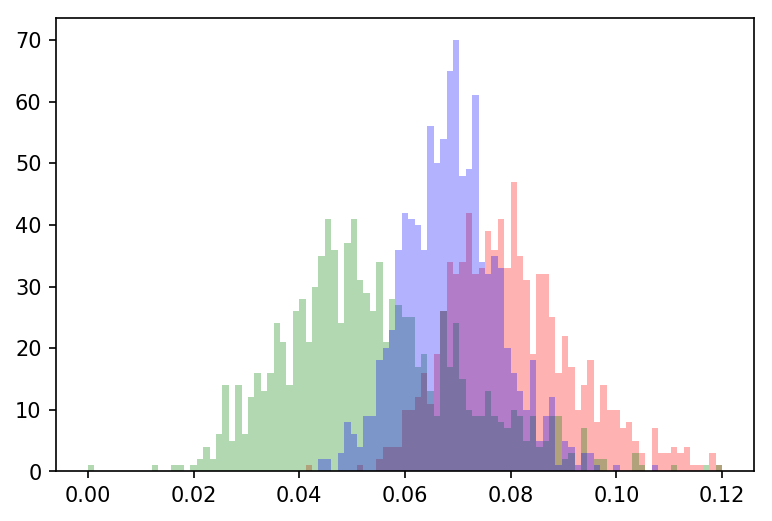

In [34]:
plt.hist(wass_five_prime,color='r',bins=np.linspace(0,0.12,100),alpha=0.3);
plt.hist(wass_seven_prime,color='g',bins=np.linspace(0,0.12,100),alpha=0.3);
plt.hist(wass_nine_prime,color='b',bins=np.linspace(0,0.12,100),alpha=0.3);

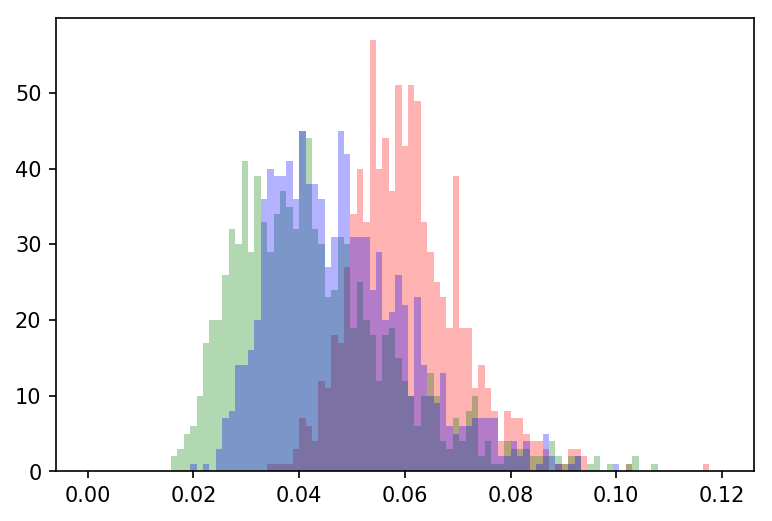

In [25]:
plt.hist(wass_five,color='r',bins=np.linspace(0,0.12,100),alpha=0.3);
plt.hist(wass_seven,color='g',bins=np.linspace(0,0.12,100),alpha=0.3);
plt.hist(wass_nine,color='b',bins=np.linspace(0,0.12,100),alpha=0.3);

In [36]:
with open(r"vae_mnist_v3_wass_fiverand.pickle", "wb") as output_file:
    pickle.dump(wass_five_prime, output_file)

In [37]:
with open(r"vae_mnist_v3_wass_sevenrand.pickle", "wb") as output_file:
    pickle.dump(wass_seven_prime, output_file)

In [38]:
with open(r"vae_mnist_v3_wass_ninerand.pickle", "wb") as output_file:
    pickle.dump(wass_nine_prime, output_file)

In [71]:
G = ot.emd2(barycenter.reshape(-1), testdata_arr[0].reshape(-1), M)

In [63]:


a=[.5,.5]

b=[.5,.5]

M=[[0.,1.],[1.,0.]]



In [64]:
ot.emd(a,b,M)


array([[0.5, 0. ],
       [0. , 0.5]])

In [ ]:
#testdataset.data = (testdataset.data/testdataset.data.view(-1,28*28).sum(dim=1).view(-1,1,1))

In [ ]:
test_loader = torch.utils.data.DataLoader(
        testdataset,
        batch_size=1000,
        shuffle=False)

In [ ]:
for i, x in enumerate(test_loader):
    if i>0:
        break
    print(x[0].shape)
    x.to(device)
    #print(vae(x[0].to(device)).view(28,28).size())
    #plt.imshow(x[3].view(28,28))
    #print(x[7].view(28,28))
    plt.imshow(vae(x[0].view(1,28,28).to(device)).cpu().detach().view(28,28))

In [ ]:
#wasserstein_list = np.array([])
loss_list = np.array([])
for i, x in enumerate(test_loader):

    VAE_loss = torch.mean((vae(x.to(device)).view(-1,784)- x.to(device).view(-1,784))**2,dim=1).data.cpu().numpy()
    print(VAE_loss.shape)
    loss_list = np.append(loss_list,VAE_loss)

In [ ]:
loss_list.shape

In [ ]:
loss_list

In [ ]:
with open(r"vae_mnist_v3_loss_five.pickle", "wb") as output_file:
    pickle.dump(loss_list, output_file)

In [ ]:
def get_loss(digit):
    print("begin")
    testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                   transform=torchvision.transforms.ToTensor(),
                   train=False,
                   download=False)

    indices = testdataset.targets == digit

    testdataset.data, testdataset.targets = testdataset.data[indices], testdataset.targets[indices]

    test_loader = torch.utils.data.DataLoader(
            testdataset,
            batch_size=1000,
            shuffle=False)

    loss_list = np.array([])
    for i, (x,y) in enumerate(test_loader):

        VAE_loss = torch.mean((vae(x.to(device)).view(-1,784)- x.to(device).view(-1,784))**2,dim=1).data.cpu().numpy()
        print(VAE_loss.shape)
        loss_list = np.append(loss_list,VAE_loss)


    return loss_list

In [ ]:
loss_seven = get_loss(7)

In [ ]:
loss_nine = get_loss(9)

In [ ]:
with open(r"vae_mnist_v3_loss_nine.pickle", "wb") as output_file:
    pickle.dump(loss_nine, output_file)

In [ ]:
plt.hist(loss_list,color='r')
plt.hist(loss_seven,color='g')
plt.hist(loss_nine,color='b')

In [ ]:
from geomloss import SamplesLoss

loss = SamplesLoss(loss="sinkhorn", p=2, blur=.05)

In [ ]:
from scipy.stats import wasserstein_distance

In [ ]:
from scipy.stats import pearsonr

In [ ]:
test_loader = torch.utils.data.DataLoader(
        testdataset,
        batch_size=1,
        shuffle=False)

In [ ]:
wasserstein_list = np.array([])
wasserstein_scipy_list = np.array([])
for i, (x,y) in enumerate(test_loader):
    print(i)
    #print(vae(x[0].to(device)).view(28,28).size())
    #print(x[0].to(device).view(28,28).size())
    #vfunc = np.vectorize(loss,signature='(i,j,k),(j,k)->(i)')
    #print(x.to(device).view(28,28).size())
    #print(mean_image.size())
    #print(loss(x.view(28,28).to(device),mean_image.to(device)).data.cpu().numpy())
    norm_img = x/x.sum()
    print(norm_img.sum(), norm_img.size())
    #wasserstein_list = np.append(wasserstein_list,loss(x.view(28,28).to(device),mean_image.to(device)).data.cpu().numpy())
    #wasserstein_scipy_list = np.append(wasserstein_scipy_list,wasserstein_distance(x.view(784).data.cpu().numpy(),mean_image.view(784).data.cpu().numpy()))
    #print(x[0])
    #print(mean_image)

In [ ]:
pearsonr_test = pearsonr(loss_list, wasserstein_list)


In [ ]:
pearsonr_test

In [ ]:
pearsonr_test

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [ ]:
plt.hexbin(loss_list,wasserstein_list,gridsize=30)
plt.xlabel('MSE for Model trained on 7')
plt.ylabel('Wasserstein Distance from avg. 7')
plt.text(0.06,1.3,f'pearson correlation = {pearsonr_test[0]:.4f}',color='white')
plt.text(0.06,1.2,f'Reference 7, evaluated on 5',color='white')

In [ ]:
mean_norm_image

In [ ]:
from geomloss import SamplesLoss

loss = SamplesLoss(loss="sinkhorn", p=2, blur=.00001)

In [ ]:
import ot
import ot.plot

In [ ]:
testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                   transform=torchvision.transforms.ToTensor(),
                   train=False,
                   download=False)

In [ ]:
test_loader = torch.utils.data.DataLoader(
            testdataset,
            batch_size=1,
            shuffle=False)

In [ ]:
import time

In [ ]:
for i, (x,y) in enumerate(test_loader):
    
    start = time.time()
    norm = x/255.
    M = ot.dist(norm.view(28,28), mean_norm_image, metric='euclidean')
    end = time.time()
    print(end-start)
    print(M[:1])

In [ ]:
def get_loss_and_wasserstein(digit):
    print("begin")
    testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                   transform=torchvision.transforms.ToTensor(),
                   train=False,
                   download=False)

    indices = testdataset.targets == digit

    testdataset.data, testdataset.targets = testdataset.data[indices], testdataset.targets[indices]

    test_loader = torch.utils.data.DataLoader(
            testdataset,
            batch_size=1000,
            shuffle=False)

    loss_list = np.array([])
    for i, (x,y) in enumerate(test_loader):

        VAE_loss = torch.mean((vae(x.to(device)).view(-1,784)- x.to(device).view(-1,784))**2,dim=1).data.cpu().numpy()
        print(VAE_loss.shape)
        loss_list = np.append(loss_list,VAE_loss)

    test_loader = torch.utils.data.DataLoader(
            testdataset,
            batch_size=1,
            shuffle=False)

    #wasserstein_list = np.array([])
    #wasserstein_scipy_list = np.array([])
    wasserstein_ot_list = np.array([])
    M = ot.dist(x[0].view(28,28), mean_norm_image, metric='euclidean')
    for i, (x,y) in enumerate(test_loader):
        print(i)
        norm_image = x/x.sum()
        print(norm_image.view(28,28).numpy().shape)
        print(mean_norm_image.shape)
        #M = ot.dist(norm_image.view(28,28), mean_norm_image, metric='euclidean')
        wasserstein_ot_list = np.append(wasserstein_ot_list, ot.lp.emd2(norm_image.view(28,28).numpy(),mean_norm_image, M, processes = 2) )
        #wasserstein_list = np.append(wasserstein_list,loss(norm_image.view(28,28).to(device),mean_norm_image.to(device)).data.cpu().numpy())
        #wasserstein_scipy_list = np.append(wasserstein_scipy_list,wasserstein_distance(x.view(784).data.cpu().numpy(),mean_image.view(784).data.cpu().numpy()))
        
    #return loss_list, wasserstein_list, wasserstein_scipy_list
    return loss_list, wasserstein_ot_list

In [ ]:
five_loss, five_ot = get_loss_and_wasserstein(5)

In [ ]:
five_loss, five_wass, five_scipy = get_loss_and_wasserstein(5)

In [ ]:
seven_loss, seven_wass, seven_scipy = get_loss_and_wasserstein(7);

In [ ]:
nine_loss, nine_wass, nine_scipy = get_loss_and_wasserstein(9)

In [ ]:
plt.hist(five_loss,bins=np.arange(0,0.2,0.001),alpha=0.3);
plt.hist(nine_loss,bins=np.arange(0,0.2,0.001),alpha=0.3);

In [ ]:
plt.hist(five_wass,bins=np.linspace(0,0.0006,200),alpha=0.3);
plt.hist(seven_wass,bins=np.linspace(0,0.0006,200),alpha=0.3);

In [ ]:
def get_tpr_fpr(sigloss,bkgloss,range_low, range_high, aetype='bkg'):
    bins = np.linspace(range_low,range_high,1001)
    tpr = []
    fpr = []
    for cut in bins:
        if aetype == 'sig':
            tpr.append(np.where(sigloss<cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss<cut)[0].shape[0]/len(bkgloss))
        if aetype == 'bkg':
            tpr.append(np.where(sigloss>cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss>cut)[0].shape[0]/len(bkgloss))
    return tpr,fpr  

In [ ]:
loss_tpr, loss_fpr = get_tpr_fpr(five_loss, seven_loss, 0, 0.2)

In [ ]:
wass_tpr, wass_fpr = get_tpr_fpr(five_wass, seven_wass, 0.2, 1.8)

In [ ]:
plt.plot(loss_fpr, loss_tpr, label='7 Trained Model MSE (5 vs 7)')
plt.plot(wass_fpr, wass_tpr, label='Wasserstein-distance from Mean of digit 7 (5 vs 7)')
plt.legend(loc=4,fontsize=10)
plt.xlabel('fpr')
plt.ylabel('tpr')